<a href="https://colab.research.google.com/github/brendanpshea/programming_problem_solving/blob/main/Programming_06_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It's Time to Play Ball (with `matplotlib`)!
### Brendan Shea, PhD

Matplotlib is a powerful and versatile plotting library in Python, widely used for data visualization. It's an essential tool in the toolbox of any data scientist, engineer, or analyst. Matplotlib provides a wide range of plotting functions that make it easy to create static, animated, and interactive visualizations. It excels in making complex tasks simple and straightforward, turning raw data into clear, comprehensible visuals.

One of the strengths of Matplotlib is its ability to integrate with other Python libraries like NumPy and Pandas, allowing for efficient data manipulation and visualization. Whether you're working on a detailed scientific plot, a histogram for statistical data, or a simple line chart, Matplotlib has the functionality you need.

Some main types of graphics supported by matplotlib include the following.

| Type of Graph | Description |
| --- | --- |
| Line Graph | Useful for showing trends over time. |
| Bar Chart | Ideal for comparing quantities among different groups. |
| Histogram | Best for showing the distribution of a dataset. |
| Scatter Plot | Excellent for observing the relationship between two variables. |
| Pie Chart | Suitable for displaying data proportions in a whole. |
| Box Plot | Efficient for depicting groups of numerical data through their quartiles. |
| Heatmap | Great for representing data density or intensity of variables, revealing patterns in complex datasets. |

Imagine a sport popular among Munchkins in the land of Oz, called "Emerald Ball." In this game, players score points by tossing a magical ball into various enchanted hoops. Let's visualize the average scores of top Munchkin players using Matplotlib.

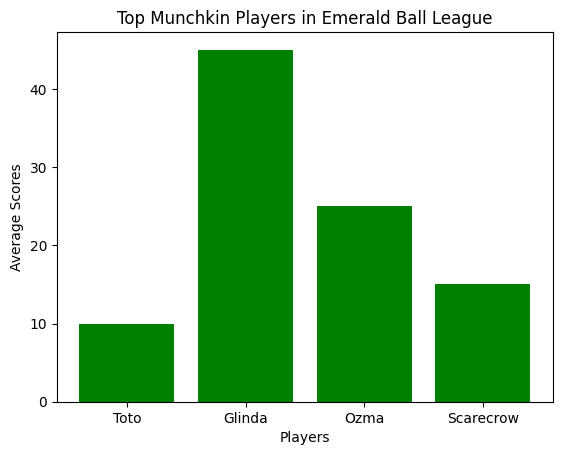

In [1]:
import matplotlib.pyplot as plt

# Sample data for Munchkin players
players = ['Toto', 'Glinda', 'Ozma', 'Scarecrow']
average_scores = [10, 45, 25, 15]

plt.bar(players, average_scores, color='green')
plt.xlabel('Players')
plt.ylabel('Average Scores')
plt.title('Top Munchkin Players in Emerald Ball League')
plt.show()


In this example:

-   We import the `matplotlib.pyplot` module, a primary module in Matplotlib used for plotting graphs.
-   The `players` list contains the names of the players, and `average_scores` represents their corresponding scores.
-   `plt.bar()` creates a bar chart, with `players` on the x-axis and `average_scores` on the y-axis.
-   The `color` parameter in `plt.bar()` is set to 'green', aligning with the emerald theme of Oz.
-   `plt.xlabel()` and `plt.ylabel()` add labels to the x-axis and y-axis, respectively.
-   `plt.title()` provides a title to the bar chart.
-   Finally, `plt.show()` displays the plot.


In this chapter, we'll be exploring how to create a variety of visualizations.

## Intro the Baseball Data Set
In order to demonstrate the functionality of `matplotlib`, we'll explore the widely used  `baseball` dataset. This data set encapsulates the yearly batting records of major league baseball players, serves as an ideal resource for exploring rich, numeric data in the context of data science education. This dataset, sourced from <http://www.baseball-databank.org/> (now defunct), encompasses 21,699 records and covers 1,228 players spanning the years 1871 to 2007. Its inclusion criteria emphasize players with more than 15 seasons of play, ensuring a wealth of longitudinal data.

### Why Use This Dataset?
I realize many of you may not know much about baseball, and that's OK! Here's the idea behing using this data.

1.  The dataset's extensive range of variables and historical depth provides a fertile ground for applying various data science techniques for anaylsis and visualization.

2. The dataset is predominantly numeric, a trait that simplifies certain types of analysis and visualization, especially for beginners.

3. Baseball, as a sport, is quantitatively driven, making this dataset an exemplary case for understanding how data analysis can offer insights into real-world scenarios.

### Dataset Format

The dataset is structured as a data frame with dimensions 21,699 x 22, meaning it contains 21,699 records across 22 variables.
### Key Variables

-   id: A unique identifier for each player.
-   year: The specific year of the record.
-   team, lg: Information about the team and league.
-   g, ab, r: Game statistics including the number of games, times at bat, and runs.
-   h, X2b, X3b, hr: Hit details, including total hits and hits resulting in reaching different bases.
-   rbi, sb, cs: Runs batted in and base-stealing statistics.
-   bb, so, ibb: Walks and strikeouts, both intentional and overall.
-   hbp, sh, sf, gidp: Other batting statistics like hits by pitch and sacrifice hits.

This dataset is included in the `pydataset` package, which include hundreds of pre-formatted datasets intended for educational purposes. Here's how we do this.

In [2]:
# Load the "baseball" dataset
!pip install pydataset -q # Install required packages
from pydataset import data
import pandas as pd

baseball_df = data('baseball')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


Now, we are going to **"clean"** the data to prepare it for further analysis. Here, we are focusing on players after 1900, and dropping columns that have significant numbers of **null** (missing) values.

In [3]:
# drop players before 1914 (when Babe Ruth started)
baseball_df = baseball_df[baseball_df.year >= 1914]
# drop ibb, sf, cs, gidp
baseball_df = baseball_df.drop(columns=['ibb', 'sf', 'cs', 'gidp'])

## Basic Data Exploration
Let's take a brief look our cleaned data before moving on to visualizations.

In [4]:
# Display the first few records
baseball_df.head()

,id,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,bb,so,hbp,sh
14423,ainsmed01,1914,1,WS1,AL,62,151,11,34,7,0,0,13.0,8.0,9,28.0,1.0,1.0
14425,altroni01,1914,1,WS1,AL,1,0,0,0,0,0,0,0.0,0.0,0,0.0,0.0,0.0
14427,austiji01,1914,1,SLA,AL,130,466,55,111,16,4,0,30.0,20.0,40,59.0,1.0,16.0
14441,bendech01,1914,1,PHA,AL,28,62,4,9,1,0,1,8.0,0.0,4,13.0,0.0,4.0
14460,bressru01,1914,1,PHA,AL,29,51,6,11,1,1,0,4.0,0.0,6,7.0,1.0,2.0


In [5]:
# Information about data types and missing values
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19194 entries, 14423 to 89534
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      19194 non-null  object 
 1   year    19194 non-null  int64  
 2   stint   19194 non-null  int64  
 3   team    19194 non-null  object 
 4   lg      19194 non-null  object 
 5   g       19194 non-null  int64  
 6   ab      19194 non-null  int64  
 7   r       19194 non-null  int64  
 8   h       19194 non-null  int64  
 9   X2b     19194 non-null  int64  
 10  X3b     19194 non-null  int64  
 11  hr      19194 non-null  int64  
 12  rbi     19194 non-null  float64
 13  sb      19194 non-null  float64
 14  bb      19194 non-null  int64  
 15  so      19194 non-null  float64
 16  hbp     19192 non-null  float64
 17  sh      19194 non-null  float64
dtypes: float64(5), int64(10), object(3)
memory usage: 2.8+ MB


Our cleaned data contains information about baseball players, including their id, year, stint, team, league, games played, at bats, runs, hits, doubles, triples, home runs, runs batted in, stolen bases, walks, strikeouts, hit by pitch, and sacrifice hits. There are 19194 rows and 18 columns. There are no missing values in the data except for hbp, which has 2 missing values.

## Line Graphs Display Change Over Time
**Line graphs** are essential tools for displaying trends and changes over time. They connect individual data points in a sequence, typically along two axes, creating a 'line' that represents the data's trajectory. Line graphs are most effective when tracking changes across evenly spaced intervals, like time. They are commonly used in various fields such as finance, science, and economics to track stock prices, temperature changes, or market trends over time.

The reason to use a line graph is its clarity in showcasing the direction and rate of change. It helps in identifying trends, patterns, and potential anomalies. For example, in environmental studies, a line graph could illustrate the change in average global temperatures over the decades.

### Creating Line Graphs with Pandas

Pandas integrates seamlessly with Matplotlib for plotting purposes. The beauty of Pandas is its simplicity in converting DataFrame columns into graphical representations. The general syntax to create a line graph directly from a Pandas DataFrame is:

```python
DataFrame.plot.line(
  x='x_column', # required
  y='y_column', # required
  figsize=(width, height), # optional
  grid=True,  # optional
  title='Your Title',  # optional
  xlabel='X-axis Label', # optional
  ylabel='Y-axis Label') # optional
```

Where:

-   `x='x_column'` specifies the column for the x-axis.
-   `y='y_column'` is the column for the y-axis.
-   `figsize` determines the size of the plot.
-   `grid` adds a grid for easier reading.
-   `title`, `xlabel`, and `ylabel` provide context through labels and titles.

For example, `baseball_df`  includes data on home runs ('hr') per year. To visualize the trend of home runs over the years, you can use the following code:

In [6]:
# Create a data frame containing info on total `hr` per 'year'
yearly_home_runs = baseball_df.groupby('year')['hr'].sum().reset_index()
yearly_home_runs.head()

,year,hr
0,1914,180
1,1915,193
2,1916,175
3,1917,137
4,1918,103


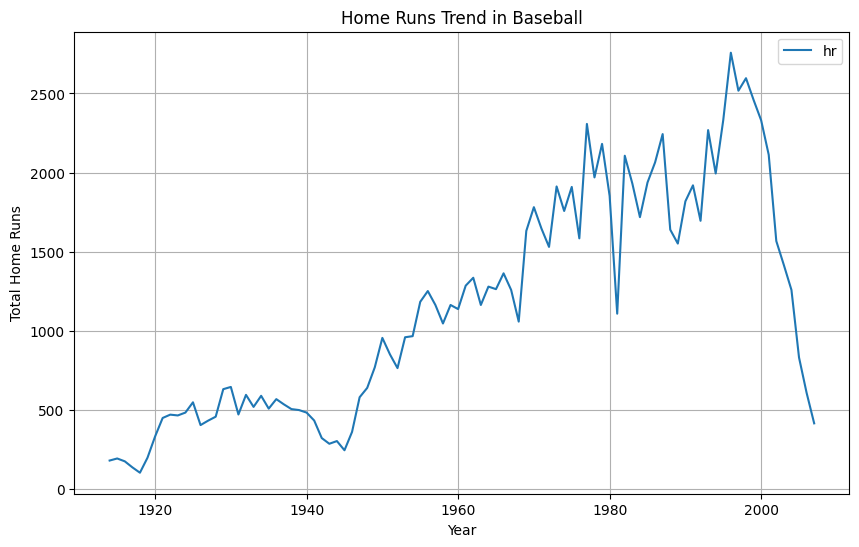

In [7]:
# Plotting the line graph
yearly_home_runs.plot.line(x='year',
                           y='hr',
                           figsize=(10, 6),
                           grid=True,
                           title='Home Runs Trend in Baseball',
                           xlabel='Year',
                           ylabel='Total Home Runs')

plt.show()


From the graph, we observe several key points:

1.  There's a general incremental increase in the total home runs from the early 20th century up to around the 1960s. This could be indicative of the evolution of the game, improvements in player training and techniques, or changes in equipment.

2.  After the 1960s, there's a significant and steady increase in the number of home runs. This era aligns with the second wave of the 'live-ball era' of baseball, where changes in the game's rules, ball composition, and player athleticism likely contributed to more home runs.

3.  The graph shows sharp fluctuations in the number of home runs between the 1980s and 2000s. These could correspond to various factors such as the introduction of new baseball stadiums, changes in player strategies, or the infamous steroid era of the late 1990s and early 2000s when player performance was artificially enhanced. (In particular, the player strikes of 1981 and 1994 show up as sharp, sudden drops).

4.  There is a dramatic drop in home runs after the year 2000, which could be due to the crackdown on performance-enhancing drugs and stricter regulations being enforced in the sport.

## Scatterplots Show Relationships Between Numeric Variables
A scatter plot is a type of data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis. Scatter plots are particularly useful for identifying the type and strength of the relationship between two variables. If the data points make a line or curve when plotted, it indicates that a relationship exists. For instance, a scatter plot can help determine if an increase in one variable correlates with an increase (or decrease) in another, indicating a positive or negative correlation.

Scatter plots are widely used in statistics, economics, and the natural sciences. For example, in healthcare, scatter plots can illustrate the relationship between exercise frequency and blood pressure levels. They allow researchers to visually assess correlations and can serve as a preliminary indicator of potential causal relationships.

### Creating Scatter Plots with Pandas

Pandas provides a convenient method to create scatter plots directly from a DataFrame, utilizing the `plot()` function, which is highly customizable with various parameters. The general syntax to create a scatter plot is:

```python
DataFrame.plot.scatter(
  x='x_column', # required
  y='y_column', # required
  c='color', # optional
  s='size', # optional
  title='Your Title' # optional)

```

Where:

-   `x='x_column'` denotes the column to be used for the x-axis.
-   `y='y_column'` denotes the column to be used for the y-axis.
-   `c='color'` allows you to specify the color of the markers.
-   `s='size'` sets the size of the markers.
-   `title='Your Title'` adds a title to the scatter plot.


Let's say we want to analyze the relationship between at-bats ('ab') and hits ('h') for players in the baseball dataset. The following code block demonstrates how you might create a scatter plot for this purpose:

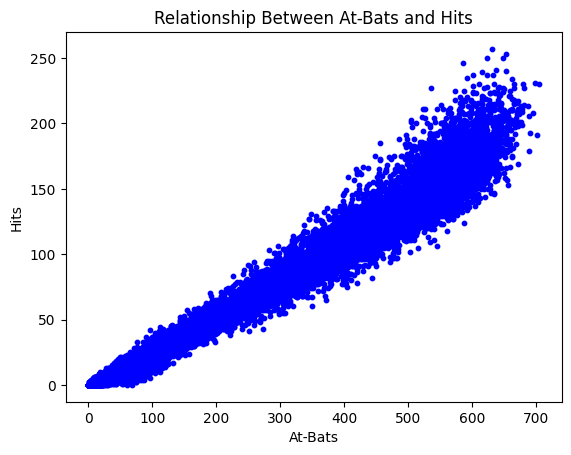

In [8]:
# Plotting the scatter plot
baseball_df.plot.scatter(
    x='ab',
    y='h',
    c='blue',
    s=10,
    title='Relationship Between At-Bats and Hits')

plt.xlabel('At-Bats')
plt.ylabel('Hits')
plt.show()


This shows a *very* strong relationship between the two variables, which isn't surprising -- more chances to hit ("at bats") generally lead to more hits.

## Bar Charts for Comparing Numeric Variables By Category
 A bar chart is a graphical representation used to compare the size of different data points or categories using bars. Each bar's length (or height, in the case of horizontal bars) is proportional to the value it represents. Bar charts are particularly effective for comparing discrete categories or groups. In a bar chart, one axis represents the categories being compared, and the other axis represents a value scale. They are best used when you want to show differences between groups, rather than changes over time, which are better represented by a line graph.

Bar charts are a staple in business, science, and education for their clarity and ease of interpretation. They can highlight differences between groups, such as the sales performance of different products or the population of various cities.

### Creating Bar Charts with Pandas

Pandas, coupled with Matplotlib, makes it straightforward to create bar charts from a DataFrame. The `plot()` function can be used with the `kind='bar'` parameter to create vertical bar charts or `kind='barh'` for horizontal bar charts. Here is the general syntax for creating a bar chart using Pandas:

```python
DataFrame.plot(
  kind='bar', # required
  x='category_column', # required
  y='value_column', # required
  color='color', # optional
  title='Your Title', # optional
  legend=True)
```

Where:

-   `kind='bar'` specifies that you want to create a bar chart.
-   `x='category_column'` is the column that contains the categories.
-   `y='value_column'` is the column that contains the numerical data.
-   `color='color'` sets the color of the bars.
-   `title='Your Title'` adds a title to the bar chart.
-   `legend=True` includes a legend to identify data series.



Now, let's create a bar chart to display the top 10 overall run scorers in the `baseball_df` DataFrame. We'll need to aggregate the total runs scored by each player and then sort these totals to find the top scorers:

In [21]:
# Group by playerID and sum the runs
player_total_runs = baseball_df.groupby('id')['r'].sum().sort_values(ascending=False)

# Select the top 10 run scorers
top_scorers = player_total_runs.head(10)

top_scorers

id
henderi01    2295
bondsba01    2227
aaronha01    2174
ruthba01     2174
rosepe01     2165
mayswi01     2062
musiast01    1949
gehrilo01    1888
ottme01      1859
biggicr01    1844
Name: r, dtype: int64

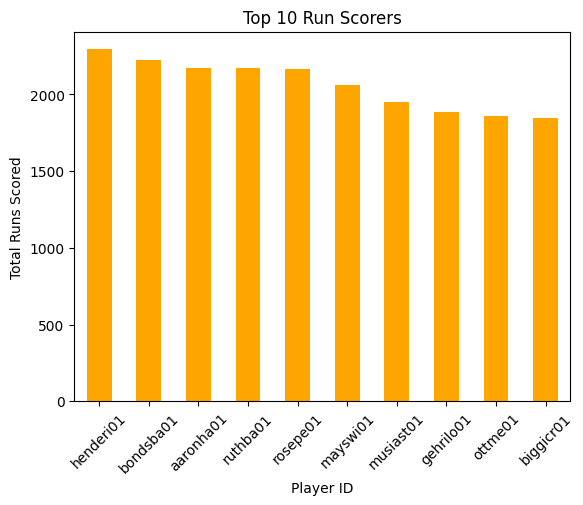

In [22]:
# Plotting the bar chart
top_scorers.plot.bar(
    color='orange',
    title='Top 10 Run Scorers')

plt.xlabel('Player ID')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.show()

The bar chart depicting the top 10 run scorers in our baseball dataset reveals a list of legendary players, each with a remarkable number of runs scored throughout their careers. Leading the chart is Rickey Henderson (henderi01) with 2,295 runs, followed closely by Barry Bonds (bondsba01) with 2,227 runs. Not far behind are Hank Aaron (aaronha01) and Babe Ruth (ruthba01), both tied with 2,174 runs. Pete Rose (rosepe01) rounds out the top five with 2,165 runs. Further down the list, we have Willie Mays (mayswi01) with 2,062 runs, Stan Musial (musiast01) with 1,949 runs, Lou Gehrig (gehrilo01) with 1,888 runs, Mel Ott (ottme01) with 1,859 runs, and Craig Biggio (biggicr01) with 1,844 runs.